<a href="https://colab.research.google.com/github/lygitdata/STATS-415-Project/blob/main/code/STATS_415_Kaggle_Li_Yuan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import random
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Data Cleaning

In [ ]:
# Import training set
X_train = pd.read_csv('https://stats415.ly.gd.edu.kg/kaggleData/X_train.csv')
y_train = pd.read_csv('https://stats415.ly.gd.edu.kg/kaggleData/y_train.csv')
# Import testing set
X_test = pd.read_csv('https://stats415.ly.gd.edu.kg/kaggleData/X_test.csv')
y_sample = pd.read_csv('https://stats415.ly.gd.edu.kg/kaggleData/y_sample.csv')

# Dummy variable transform
categorical_cols = ['self_eval', 'teacher_eval', 'district']
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
print(X_train.shape)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)
print(X_test.shape)

# Drop and save SEQN
SEQN_X_train = X_train['SEQN']
X_train = X_train.drop(columns=['SEQN'])
SEQN_y_train = y_train['SEQN']
y_train = y_train.drop(columns=['SEQN'])
SEQN_X_test = X_test['SEQN']
X_test = X_test.drop(columns=['SEQN'])

# Scale data
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.fit_transform(X_test[X_test.columns])

# Convert data to numpy arrays
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()

(8000, 65)
(4000, 65)


# Model Training

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.15,
    decay_steps=2000,
    decay_rate=0.9
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True
    ),
    keras.callbacks.ModelCheckpoint(
        "best_model.h5",
        save_best_only=True,
        monitor='val_loss'
    )
]

def build_model():
    model = Sequential([
        layers.Dense(units=4096, activation='elu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(units=2048, activation='elu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(units=512, activation='elu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(units=1, activation='linear')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
        loss="mean_squared_error",
        metrics=[tf.keras.metrics.R2Score(name='r2_score')]
    )

    return model

kf = KFold(n_splits=15, shuffle=True, random_state=42)

mse_scores = []
r2_scores = []
i = 0
for train_index, val_index in kf.split(X_train):
    i = i + 1
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = build_model()
    history = model.fit(
        X_train_fold, y_train_fold,
        epochs=200,
        batch_size=512,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=callbacks,
        verbose=0
    )

    y_val_pred = model.predict(X_val_fold, verbose=False)
    mse = mean_squared_error(y_val_fold, y_val_pred)
    mse_scores.append(mse)
    r2 = r2_score(y_val_fold, y_val_pred)
    r2_scores.append(r2)
    print(i, "Fold | Validation MSE =", round(mse, 5), " | Validation Adjusted R^2 =", round(r2, 5))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1 Fold | Validation MSE = 0.25931  | Validation Adjusted R^2 = 0.87898
2 Fold | Validation MSE = 0.26624  | Validation Adjusted R^2 = 0.87513
3 Fold | Validation MSE = 0.31726  | Validation Adjusted R^2 = 0.86276
4 Fold | Validation MSE = 0.27938  | Validation Adjusted R^2 = 0.87559
5 Fold | Validation MSE = 0.28143  | Validation Adjusted R^2 = 0.87503
6 Fold | Validation MSE = 0.29772  | Validation Adjusted R^2 = 0.86084
7 Fold | Validation MSE = 0.29124  | Validation Adjusted R^2 = 0.88963
8 Fold | Validation MSE = 0.28726  | Validation Adjusted R^2 = 0.88421
9 Fold | Validation MSE = 0.27894  | Validation Adjusted R^2 = 0.88395
10 Fold | Validation MSE = 0.28299  | Validation Adjusted R^2 = 0.8864
11 Fold | Validation MSE = 0.29481  | Validation Adjusted R^2 = 0.87223


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12 Fold | Validation MSE = 0.25631  | Validation Adjusted R^2 = 0.87658
13 Fold | Validation MSE = 0.27207  | Validation Adjusted R^2 = 0.88762


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14 Fold | Validation MSE = 0.25318  | Validation Adjusted R^2 = 0.8825
15 Fold | Validation MSE = 0.26523  | Validation Adjusted R^2 = 0.88985


Mean MSE = 0.27888984818968704
Std Dev MSE = 0.016879391450530936
Mean Adj. R^2 = 0.8787540179175877
Std Dev Adj. R^2 =  0.008604097513337367


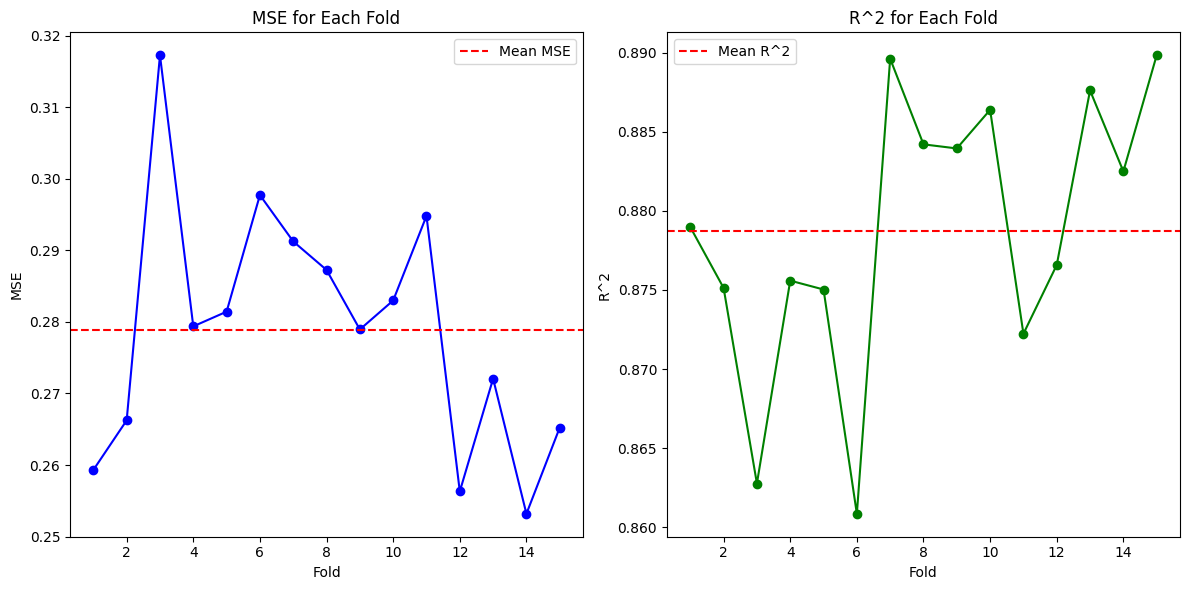

In [ ]:
print("Mean MSE =", np.mean(mse_scores))
print("Std Dev MSE =", np.std(mse_scores))
print("Mean Adj. R^2 =", np.mean(r2_scores))
print("Std Dev Adj. R^2 = ", np.std(r2_scores))

# Plot MSEs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(mse_scores) + 1), mse_scores, marker='o', linestyle='-', color='b')
plt.axhline(y=np.mean(mse_scores), color='r', linestyle='--', label='Mean MSE')
plt.title('MSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()

# Plot R^2s
plt.subplot(1, 2, 2)
plt.plot(range(1, len(r2_scores) + 1), r2_scores, marker='o', linestyle='-', color='g')
plt.axhline(y=np.mean(r2_scores), color='r', linestyle='--', label='Mean R^2')
plt.title('R^2 for Each Fold')
plt.xlabel('Fold')
plt.ylabel('R^2')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_temp = model.predict(X_train)
mean_squared_error(y_temp, y_train)

250/250 [==============================] - 1s 3ms/step


0.2048125100520972

In [ ]:
y_test = model.predict(X_test)
output = pd.DataFrame({'SEQN': SEQN_X_test.values.flatten(), 'y': y_test.flatten()})
out = y_sample.merge(output, on=['SEQN'], how="left")
out = out.drop(columns=['y_x'])
out = out.rename(columns={'y_y': 'y'})
out

125/125 [==============================] - 0s 3ms/step


,SEQN,y
0,492834,1.122306
1,309349,-1.234058
2,468308,-1.254306
3,838812,-2.883308
4,947936,0.887334
...,...,...
3995,971604,0.358780
3996,2790,-0.616838
3997,159210,-0.791514
3998,366040,0.291725


In [ ]:
out.to_csv('result.csv', index=False)